In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np
import os
import gc
import matplotlib.pyplot as plt

In [4]:
import json, pdb
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [15]:
os.getcwd()

'/Users/nikolaslaskaris/Documents/fellowshipai'

In [16]:
anno = pd.read_csv('GroundTruth2.csv')

In [17]:
anno.head()

,Image_id,x1,y1,label,x2,y2
0,adidas/000001.jpg,427.00000,284.000000,adidas,514.00000,365.000000
1,adidas/000002.jpg,290.00000,270.000000,adidas,376.00000,341.000000
2,adidas/000003.jpg,286.25000,47.500000,adidas,382.25000,115.000000
3,adidas/000004.jpg,554.20205,729.893851,adidas,605.17716,792.863104
4,adidas/000005.jpg,305.75000,325.000000,adidas,436.25000,466.000000


In [18]:
IM_ID, X1, Y1, LABEL, X2, Y2 = ['Image_id', 'x1', 'y1', 'label', 'x2', 'y2']

In [19]:
anno = anno[[IM_ID, X1, Y1, X2, Y2, LABEL]]

In [20]:
anno[LABEL][:5]

0    adidas
1    adidas
2    adidas
3    adidas
4    adidas
Name: label, dtype: object

In [21]:
anno[LABEL] = pd.Categorical(anno[LABEL])

In [22]:
anno['label_num'] = anno[LABEL].cat.codes

In [23]:
LABEL_NUM = 'label_num'

In [24]:
df = pd.DataFrame()

In [25]:
df

""


In [26]:
labels = anno['label'].unique()

In [27]:
for i in range(len(labels)):
    df = df.append(anno[anno['label'] == labels[i]][:10])

In [28]:
tiny = pd.DataFrame()

In [43]:
tiny = tiny.append(df[df['label'] == 'adidas'])

In [44]:
tiny

,Image_id,x1,y1,x2,y2,label,label_num
323,apple/000325.jpg,438.000000,423.000000,471.000000,463.000000,apple,3
324,apple/000326.jpg,98.000000,436.000000,165.000000,661.000000,apple,3
325,apple/000327.jpg,121.000000,235.000000,137.000000,256.000000,apple,3
326,apple/000328.jpg,509.000000,162.000000,534.000000,193.000000,apple,3
327,apple/000329.jpg,104.616398,65.718155,414.964861,463.024158,apple,3
328,apple/000330.jpg,103.000000,31.000000,685.000000,713.000000,apple,3
329,apple/000331.jpg,238.000000,296.000000,525.000000,452.000000,apple,3
330,apple/000332.jpg,361.000000,214.000000,394.000000,246.000000,apple,3
331,apple/000333.jpg,416.000000,456.000000,448.000000,498.000000,apple,3
332,apple/000334.jpg,323.000000,312.000000,355.000000,359.000000,apple,3


In [45]:
trn_anno = collections.defaultdict(lambda:[])

In [46]:
trn_anno

defaultdict(<function __main__.<lambda>()>, {})

In [47]:
tiny.index

Int64Index([323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 166, 167, 168,
            169, 170, 171, 172, 173, 174, 175,   0,   1,   2,   3,   4,   5,
              6,   7,   8,   9],
           dtype='int64')

In [48]:
cats_tiny = dict((tiny['label_num'][i], tiny['label'][i]) for i in tiny.index)

In [49]:
cats_tiny

{3: 'apple', 2: 'aldi', 1: 'adidas'}

In [50]:
len(tiny)

30

In [51]:
    for o in tiny.index:
    
        bb = np.array([int(tiny[Y2][o]),
                       int(tiny[X1][o]),
                       int(tiny[Y1][o]),
                       int(tiny[X2][o])])

        cat = tiny[LABEL_NUM][o]

        trn_anno[tiny[IM_ID][o]].append((bb, cat))

        
len(trn_anno)

30

In [52]:
im_a = trn_anno[anno[IM_ID][0]]; im_a[0][-1]

1

In [53]:
trn_anno['adidas/000001.jpg']

[(array([365, 427, 284, 514]), 1)]

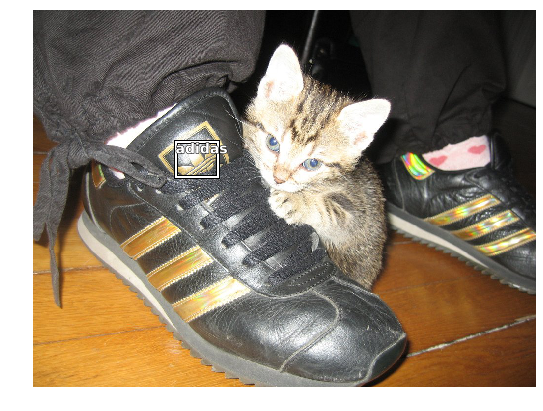

In [56]:
im = open_image(anno.iloc[1][IM_ID])
bbox = ImageBBox.create(*im.size, 
                        [trn_anno[anno.iloc[1][IM_ID]][0][0]],
                        labels = [0],
                        classes = [anno.iloc[1][LABEL]])
im.show(y=bbox, figsize=(9,9))

In [57]:
tiny.sample().values[0]

array(['apple/000325.jpg', 438.0, 422.99999999999983, 471.0, 462.99999999999983, 'apple', 3], dtype=object)

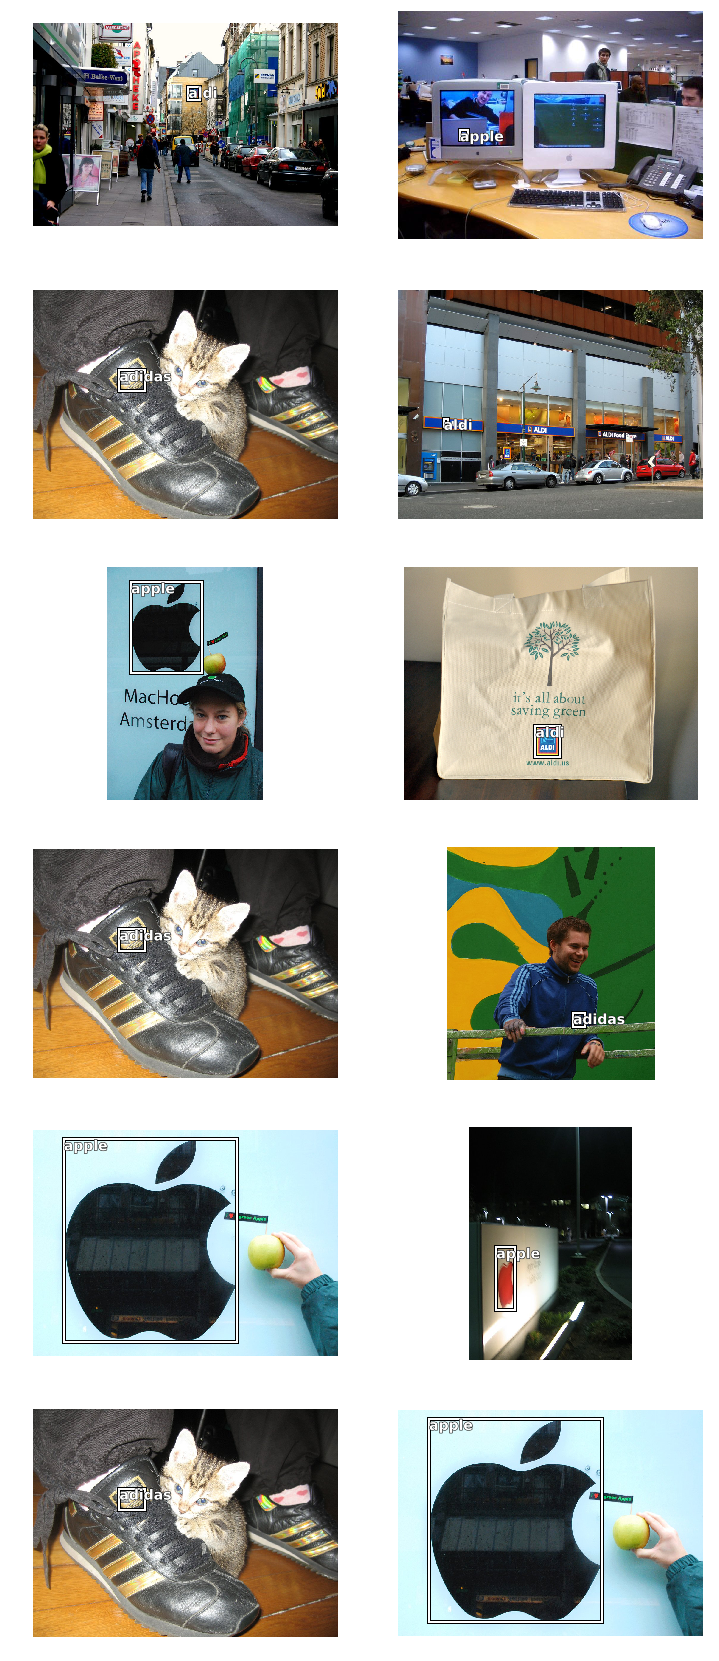

In [58]:
fig, axes = plt.subplots(6,2, figsize = (12,30))

for i, ax in enumerate(axes.flat):
    image = tiny.sample().values[0]
    logo = image[0]
    label = image[5]
    im = open_image(logo)
    bbox = ImageBBox.create(*im.size, [trn_anno[logo][0][0]], labels=[0], classes=[label])
    im.show(y=bbox, ax=ax)
    

In [59]:
#annotations = collections.defaultdict(list)
annotations = {}

In [60]:
for o in tiny.index:
    bb = list([int(tiny[Y2][o]),
                       int(tiny[X1][o]),
                       int(tiny[Y1][o]),
                       int(tiny[X2][o])])

    cat = tiny[LABEL][o]

    annotations[tiny[IM_ID][o]] = [[bb], [cat]]
    
len(annotations)

30

In [61]:
annotations

{'apple/000325.jpg': [[[462, 438, 422, 471]], ['apple']],
 'apple/000326.jpg': [[[661, 97, 436, 164]], ['apple']],
 'apple/000327.jpg': [[[255, 121, 235, 137]], ['apple']],
 'apple/000328.jpg': [[[193, 509, 162, 534]], ['apple']],
 'apple/000329.jpg': [[[463, 104, 65, 414]], ['apple']],
 'apple/000330.jpg': [[[713, 103, 31, 685]], ['apple']],
 'apple/000331.jpg': [[[452, 238, 295, 525]], ['apple']],
 'apple/000332.jpg': [[[245, 361, 213, 394]], ['apple']],
 'apple/000333.jpg': [[[498, 416, 456, 448]], ['apple']],
 'apple/000334.jpg': [[[359, 323, 312, 355]], ['apple']],
 'aldi/000167.jpg': [[[404, 410, 117, 536]], ['aldi']],
 'aldi/000168.jpg': [[[230, 867, 175, 906]], ['aldi']],
 'aldi/000169.jpg': [[[257, 522, 213, 560]], ['aldi']],
 'aldi/000170.jpg': [[[461, 152, 432, 168]], ['aldi']],
 'aldi/000171.jpg': [[[343, 422, 277, 475]], ['aldi']],
 'aldi/000172.jpg': [[[416, 557, 252, 688]], ['aldi']],
 'aldi/000173.jpg': [[[509, 236, 265, 458]], ['aldi']],
 'aldi/000174.jpg': [[[429, 324

In [62]:
str(Path('images/apple/000325.jpg').relative_to('images/'))

'apple/000325.jpg'

In [63]:
box, label = annotations[str(Path('images/apple/000325.jpg').relative_to('images/'))]

In [64]:
# def get_y_func(x):
#     if str(x.relative_to('images/')) in annotations:
#         # print(str(x.relative_to('images/')))
#         bboxes, classes = annotations[str(x.relative_to('images/'))]
#     return [bboxes, classes]

In [65]:
os.getcwd()

'/Users/nikolaslaskaris/Documents/fellowshipai/logos_tiny'

In [66]:
os.chdir('..')

In [67]:
path2fn = lambda path: re.search('\w*\/\w*\.jpg$', path).group(0)
get_y_func = lambda o: annotations[path2fn(o)]

In [69]:
def get_y_func(x):
    x = Path(x)
    bboxes, labels = annotations[str(x.relative_to('logos_tiny//'))]
    return [bboxes * 2 , labels * 2] 

In [72]:
def get_y_func_test(_):
    i = np.random.randint(4)
    bboxes = [[91.56, 51.14, 104.94, 63.68]] * (i + 1)
    categories = ['vase'] * (i + 1)
    return [bboxes, categories]

In [73]:
get_y_func_test('a')

[[[91.56, 51.14, 104.94, 63.68],
  [91.56, 51.14, 104.94, 63.68],
  [91.56, 51.14, 104.94, 63.68],
  [91.56, 51.14, 104.94, 63.68]],
 ['vase', 'vase', 'vase', 'vase']]

In [74]:
get_y_func

<function __main__.get_y_func(x)>

In [96]:
data = (ObjectItemList.from_df(pd.DataFrame(data=list(annotations.keys())), path = 'logos_tiny/')
           .random_split_by_pct()
           .label_from_func(get_y_func)
           .transform(get_transforms(), tfm_y = True, size=224)
           .databunch(bs=10, num_workers=0,collate_fn=bb_pad_collate)
           .normalize(imagenet_stats))


You can deactivate this warning by passing `no_check=True`.


/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:236: UserWarning: It's not possible to collate samples of your dataset together in a batch.
  warn(message)


In [97]:
data

ImageDataBunch;

Train: LabelList
y: ObjectCategoryList (24 items)
[ImageBBox (768, 1024), ImageBBox (842, 586), ImageBBox (450, 600), ImageBBox (681, 1024), ImageBBox (1024, 685)]...
Path: logos_tiny
x: ObjectItemList (24 items)
[Image (3, 768, 1024), Image (3, 842, 586), Image (3, 450, 600), Image (3, 681, 1024), Image (3, 1024, 685)]...
Path: logos_tiny;

Valid: LabelList
y: ObjectCategoryList (6 items)
[ImageBBox (768, 1024), ImageBBox (533, 800), ImageBBox (768, 1024), ImageBBox (768, 1024), ImageBBox (768, 1024)]...
Path: logos_tiny
x: ObjectItemList (6 items)
[Image (3, 768, 1024), Image (3, 533, 800), Image (3, 768, 1024), Image (3, 768, 1024), Image (3, 768, 1024)]...
Path: logos_tiny;

Test: None

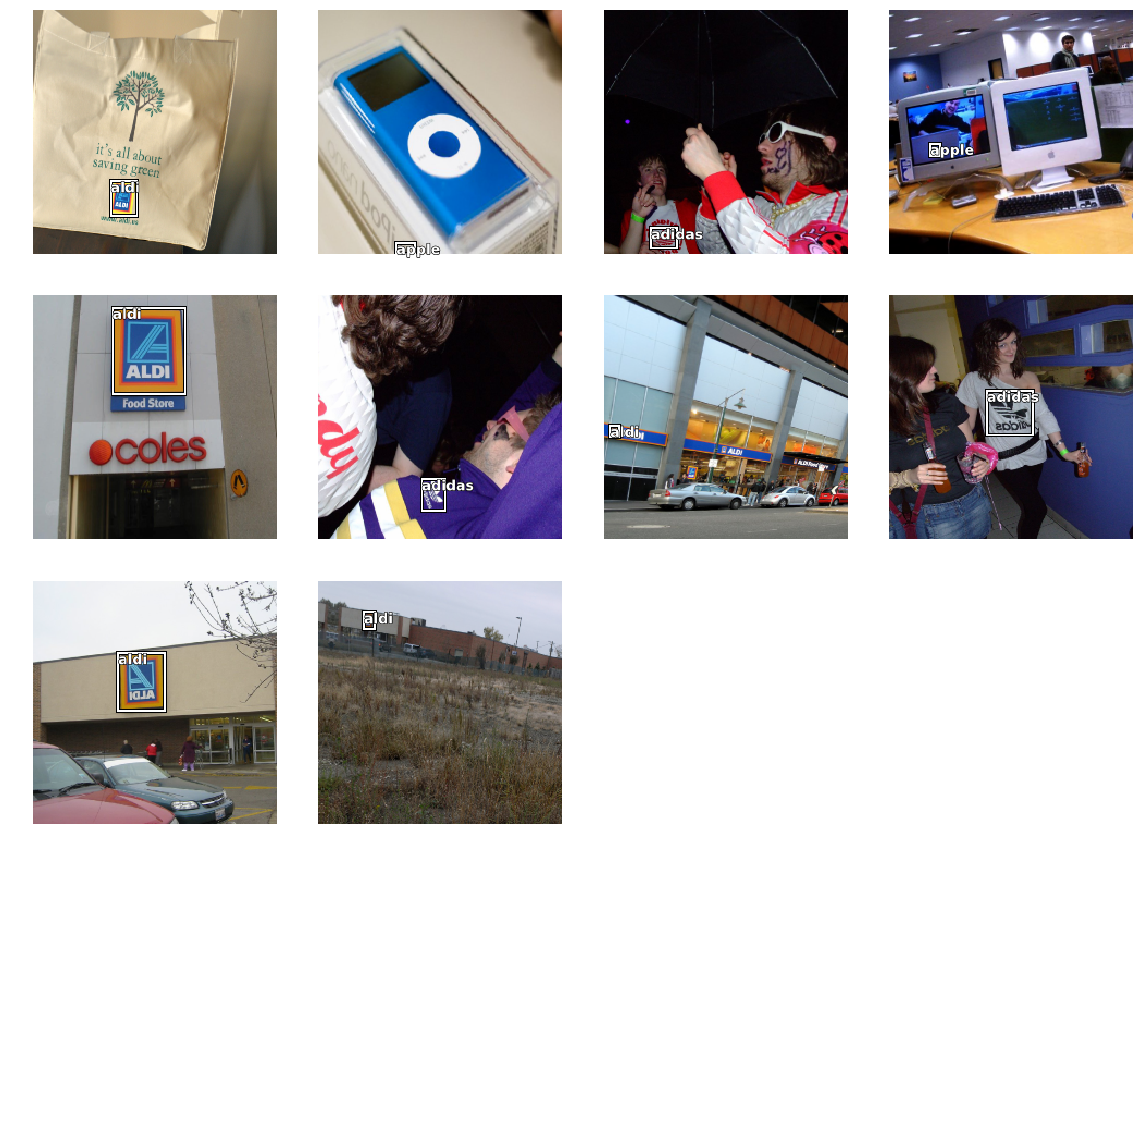

In [98]:
data.show_batch()

In [91]:
learn = create_cnn(data, models.resnet34)

In [92]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss


RuntimeError: The expanded size of the tensor (2) must match the existing size (0) at non-singleton dimension 0.  Target sizes: [2, 4].  Tensor sizes: [0, 4]

In [43]:
type(label[0])

str

In [41]:
tensor(bboxes).float()

tensor([[365., 427., 284., 514.]])

In [44]:
bboxes = tensor(bboxes).float()

In [45]:
re.search('\w*\/\w*.jpg$', 'data/images/adidas/000001.jpg').group(0)

'adidas/000001.jpg'

In [48]:
import pdb

In [49]:
os.getcwd()

'/home/laskarisnik/data'

In [71]:
data = (ObjectItemList.from_df(pd.DataFrame(data=list(annotations.keys())), path = 'images/'))

In [72]:
data

ObjectItemList (7830 items)
[Image (3, 683, 1024), Image (3, 768, 1024), Image (3, 1024, 768), Image (3, 1024, 911), Image (3, 1024, 768)]...
Path: images

In [73]:
split = data.random_split_by_pct(0.2)

In [74]:
split

ItemLists;

Train: ObjectItemList (6264 items)
[Image (3, 683, 1024), Image (3, 1024, 768), Image (3, 1024, 911), Image (3, 1024, 768), Image (3, 768, 1024)]...
Path: images;

Valid: ObjectItemList (1566 items)
[Image (3, 829, 1024), Image (3, 1024, 768), Image (3, 683, 1024), Image (3, 600, 800), Image (3, 532, 800)]...
Path: images;

Test: None

In [75]:
lbl = split.label_from_func(get_y_func)

AttributeError: 'numpy.str_' object has no attribute 'relative_to'

In [56]:
lbl

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.

In [58]:
lbl

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.

In [52]:
tfm = lbl.transform(get_transforms(), tfm_y = True, size=224)

In [55]:
bnch = tfm.databunch(bs=64, collate_fn=bb_pad_collate)

You can deactivate this warning by passing `no_check=True`.


/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:205: UserWarning: There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in [1489, 1865, 3443, 298, 2335, 4689, 13, 4555, 4789, 4163, 5924, 3685, 1332, 175, 6180, 5822, 3391, 4356, 5619, 3959, 1324, 2186, 3714, 5776, 4204, 3227, 3347, 581, 5494, 899, 3169, 4271, 3861, 6091, 5595, 1811, 5208, 5719, 4762, 4158, 4055, 5967, 3067, 1996, 3735, 513, 1022, 386, 3160, 3208, 5901, 1192, 1390, 4980, 6212, 2108, 2548, 2216, 4328, 4539, 1197, 5568, 6215, 3560]
  warn(f"There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in {idx}")


In [ ]:
bunch_norm = bunch.normalize(imagenet_stats)

In [ ]:
bunch_norm.train_ds[0]

In [ ]:
data = (ObjectCategoryList.from_df(pd.DataFrame(data=list(annotations.keys())), path = 'images/')
           .random_split_by_pct()
           .label_from_func(get_y_func_x)
           .transform(get_transforms(), tfm_y = True, size=224)
           .databunch(bs=64, collate_fn=bb_pad_collate)
           .normalize(imagenet_stats))

In [ ]:
%%time
data.show_batch()

In [ ]:
df = pd.DataFrame({'fn': [anno.iloc[o][IM_ID] for o in range(len(anno))], 
                   'bbox': bbs}, columns=['fn','bbox'])


In [ ]:
df.head(5)

In [ ]:
#df.to_csv('tmp/bbox.csv', index=False)

In [ ]:
os.getcwd()

In [ ]:
tfms = get_transforms()

In [ ]:
df.head()

In [ ]:
md = (ImageImageList.from_df(df, 'images/')
                .random_split_by_pct(0.0)
                .label_from_df()
                .transform(tfms)
                .databunch())

In [ ]:
anno.iloc[0][IM_ID]

In [ ]:
df = pd.DataFrame({'fn': [anno.iloc[o][IM_ID] for o in range(len(anno))],
                  'label': [anno.iloc[o][LABEL] for o in range(len(anno))],
                  'bbox': [' '.join(str(p) for p in trn_anno[anno.iloc[o][IM_ID]][0][0]) for o in range(len(anno))]})



In [ ]:
df.to_csv('labels.csv', index = False)

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, valid_pct=0.2, size=224)

In [ ]:
data.show_batch(rows=3)

In [ ]:
# Databunch for classifier
data = (ImageItemList.from_folder('data/images/') #Where to find the data? -> in path and its subfolders  
        .random_split_by_pct(valid_pct = 0.2)  #How to split in train/valid? -> use the folders
        .label_from_folder()                  #How to label? -> depending on the folder of the filenames
        # .add_test()                    #Optionally add a test set (here default name is test)
        .transform(tfms, size=224)                      #Data augmentation? -> use tfms with a size of 64
        .databunch())

In [ ]:
annot_dict = pd.read_csv('data/tmp/labels.csv')

In [ ]:
annot_dict.head()